# FORECSTING UNIT SALES

## NAME: RAMINI VARUN BABU.
## REG NO: 20MID0135.

Firstly, load the dataset from the given link. I have downloaded the datasets from the kaggle and loaded it using pandas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv("C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/train.csv  ")
test_data=pd.read_csv("C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/test.csv  ")
sample_data=pd.read_csv("C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/sample_submission.csv  ")

In [3]:
train_data.head(10)

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.0
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.0
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.0
5,2022-04-12_B09KTJRHC7,2022-04-12,B09KTJRHC7,"NapQueen Elsa 6"" Innerspring Mattress, Full",NaN,NAPQUEEN,0.0,0.0
6,2022-04-12_B09KTMKDKJ,2022-04-12,B09KTMKDKJ,"NapQueen Elsa 8"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.0
7,2022-04-12_B09KTMLQ1N,2022-04-12,B09KTMLQ1N,"NapQueen Elsa 8"" Innerspring Mattress, Full",NaN,NAPQUEEN,0.0,0.0
8,2022-04-12_B09MR5WS3Y,2022-04-12,B09MR5WS3Y,"NapQueen Margaret 8"" Charcoal Memory Foam Matt...",NaN,NAPQUEEN,0.0,0.0
9,2022-04-12_B09KSXP3HN,2022-04-12,B09KSXP3HN,"NapQueen Elsa 8"" Innerspring Mattress, Queen",NaN,NAPQUEEN,0.0,0.0


In [4]:
train_data.dtypes

ID             object
date           object
Item Id        object
Item Name      object
ad_spend      float64
anarix_id      object
units         float64
unit_price    float64
dtype: object

In [5]:
train_data.shape

(101490, 8)

# PREPROCESSING THE DATA

In [6]:
train_data.isna().sum()

ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64

In [7]:
train_data["Item Id"].nunique()

217

In [8]:
train_data["Item Name"].nunique()

199

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


In [10]:
train_data["ad_spend"].nunique()

19426

In [11]:
train_data["anarix_id"].nunique()

1

In [12]:
#train_data=train_data.drop(["anarix_id","Item Id","Item Name","date","ID"],axis=1)

In [13]:
train_data

,ID,date,Item Id,Item Name,ad_spend,anarix_id,units,unit_price
0,2022-04-12_B09KDTS4DC,2022-04-12,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,0.00
1,2022-04-12_B09MR2MLZH,2022-04-12,B09MR2MLZH,NapQueen 12 Inch Bamboo Charcoal Queen Size Me...,NaN,NAPQUEEN,0.0,0.00
2,2022-04-12_B09KSYL73R,2022-04-12,B09KSYL73R,"NapQueen Elsa 8"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.00
3,2022-04-12_B09KT5HMNY,2022-04-12,B09KT5HMNY,"NapQueen Elsa 6"" Innerspring Mattress, Twin",NaN,NAPQUEEN,0.0,0.00
4,2022-04-12_B09KTF8ZDQ,2022-04-12,B09KTF8ZDQ,"NapQueen Elsa 6"" Innerspring Mattress, Twin XL",NaN,NAPQUEEN,0.0,0.00
...,...,...,...,...,...,...,...,...
101485,2024-05-31_B0CR4BGLK5,2024-05-31,B0CR4BGLK5,NaN,604.73,NAPQUEEN,NaN,0.00
101486,2024-05-31_B0CR4BG4ZW,2024-05-31,B0CR4BG4ZW,NaN,261.21,NAPQUEEN,2.0,225.32
101487,2024-05-31_B0CR49NR3B,2024-05-31,B0CR49NR3B,NaN,0.00,NAPQUEEN,NaN,0.00
101488,2024-05-31_B0CR49N6MQ,2024-05-31,B0CR49N6MQ,NaN,0.00,NAPQUEEN,NaN,0.00


After finding the missing values. I have filled the null values of "ad_spend" column with 0. Since it is better to assume that they have not used any money for advertisement.


In [14]:
# Fill missing ad_spend with median
train_data['ad_spend'].fillna(0, inplace=True)
train_data['Item Id'].fillna(1,inplace=True)


In [15]:
#checking for the duplicate values.
print(train_data.duplicated().sum())

0


In [16]:
train_data.reset_index(drop=True, inplace=True)

Here, I have filled the null values of the "unit_price" and "units" column by the mean value of that particular item id

In [17]:
for column in [ 'unit_price', 'units']:
    train_data[column] = train_data.groupby('Item Id')[column].transform(lambda x: x.fillna(x.mean()))

In [18]:
train_data['units'].fillna(0, inplace=True)

In [19]:
train_data.isna().sum()

ID               0
date             0
Item Id          0
Item Name     1832
ad_spend         0
anarix_id        0
units            0
unit_price       0
dtype: int64

# EXPLORATORY DATA ANALYSIS

Removing the columns which have no correlation with the dependent variable.

In [20]:
df_encoded = pd.get_dummies(train_data, columns=['anarix_id','Item Id'])

In [21]:
train_data.corr()

,ad_spend,units,unit_price
ad_spend,1.000000,0.744339,0.054472
units,0.744339,1.000000,0.094686
unit_price,0.054472,0.094686,1.000000


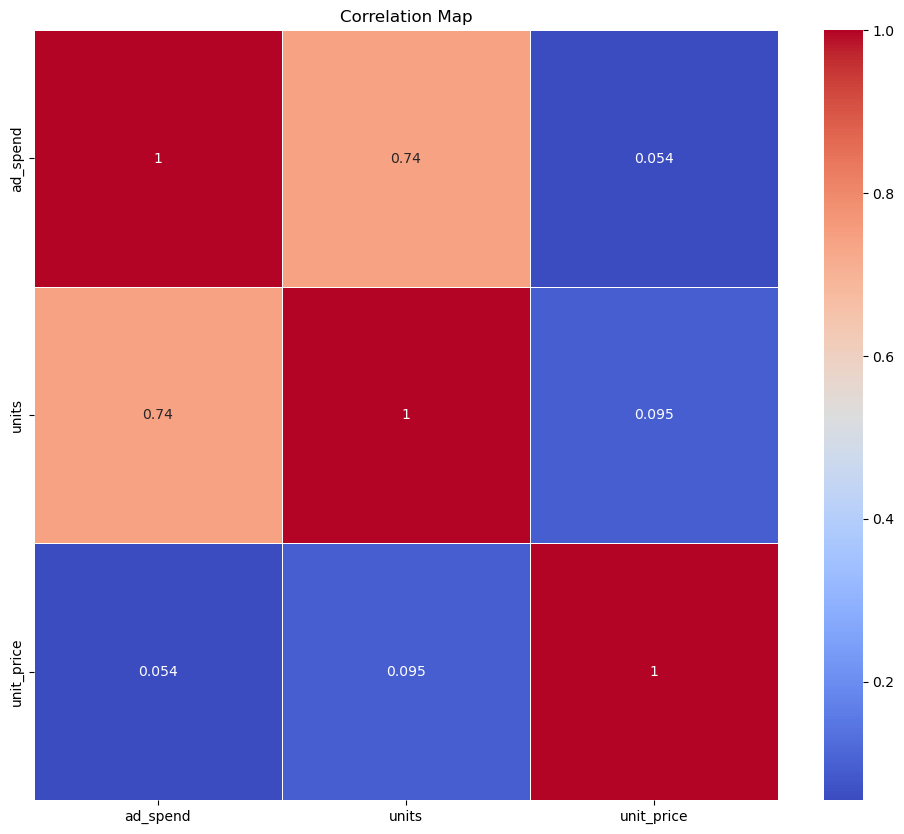

In [23]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map')
plt.show()

In [24]:
X=train_data.drop(["units","anarix_id","Item Id","Item Name","date","ID"],axis=1)
y=train_data["units"]

In [25]:
X.isna().sum()

ad_spend      0
unit_price    0
dtype: int64

In [26]:
X

,ad_spend,unit_price
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
...,...,...
101485,604.73,0.00
101486,261.21,225.32
101487,0.00,0.00
101488,0.00,0.00


In [27]:
y.isna().sum()

0

# MODEL FITTING AND EVALUATION

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')



Mean Squared Error: 1407.4349721035123


In [30]:
from xgboost import XGBRegressor
model2 = XGBRegressor()
model2.fit(X_train, y_train)

# Make predictions
y_pred2 = model2.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1407.4349721035123


In [31]:
test_data=test_data.drop(["anarix_id","Item Id","Item Name","date"],axis=1)

In [32]:
test_data

,ID,ad_spend,unit_price
0,2024-07-01_B09KDR64LT,NaN,0.0
1,2024-07-01_B09KDTS4DC,NaN,0.0
2,2024-07-01_B09KDTHJ6V,NaN,0.0
3,2024-07-01_B09KDQ2BWY,NaN,0.0
4,2024-07-01_B09KDYY3SB,101.72,1094.5
...,...,...,...
2828,2024-07-28_B0BRCW2B64,11.78,0.0
2829,2024-07-28_B0CFV6V981,1.17,0.0
2830,2024-07-28_B0BNL5BKMK,0.00,0.0
2831,2024-07-28_B0CR49BQRS,1.87,0.0


In [33]:
# Fill missing ad_spend with median
test_data['ad_spend'].fillna(0, inplace=True)

# Fill missing units with median
test_data['unit_price'].fillna(0, inplace=True)

In [34]:
test_data=test_data.drop(["ID"],axis=1)

In [35]:
y_pred1 = model.predict(test_data)

In [36]:
y_pred1

array([-1.11898259, -1.11898259, -1.11898259, ..., -1.11898259,
       -0.92423433, -0.96797459])

In [37]:
sample_data

,ID,TARGET
0,2024-07-01_B09KDR64LT,0
1,2024-07-01_B09KDTS4DC,0
2,2024-07-01_B09KDTHJ6V,0
3,2024-07-01_B09KDQ2BWY,0
4,2024-07-01_B09KDYY3SB,0
...,...,...
2828,2024-07-28_B0BRCW2B64,0
2829,2024-07-28_B0CFV6V981,0
2830,2024-07-28_B0BNL5BKMK,0
2831,2024-07-28_B0CR49BQRS,0


Saving the results from linear regression model into the submission file

In [38]:
sub=pd.read_csv("C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/test.csv  ")

In [39]:
sub["Target"]=y_pred1

In [40]:
sub

,ID,date,Item Id,Item Name,ad_spend,anarix_id,unit_price,Target
0,2024-07-01_B09KDR64LT,2024-07-01,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0,-1.118983
1,2024-07-01_B09KDTS4DC,2024-07-01,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0,-1.118983
2,2024-07-01_B09KDTHJ6V,2024-07-01,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0,-1.118983
3,2024-07-01_B09KDQ2BWY,2024-07-01,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0,-1.118983
4,2024-07-01_B09KDYY3SB,2024-07-01,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5,18.072919
...,...,...,...,...,...,...,...,...
2828,2024-07-28_B0BRCW2B64,2024-07-28,B0BRCW2B64,"NapQueen Anula Green Tea 12'', Queen",11.78,NAPQUEEN,0.0,0.107827
2829,2024-07-28_B0CFV6V981,2024-07-28,B0CFV6V981,NaN,1.17,NAPQUEEN,0.0,-0.997135
2830,2024-07-28_B0BNL5BKMK,2024-07-28,B0BNL5BKMK,"NapQueen 2'' Bamboo Charcoal Mattress Topper, ...",0.00,NAPQUEEN,0.0,-1.118983
2831,2024-07-28_B0CR49BQRS,2024-07-28,B0CR49BQRS,NaN,1.87,NAPQUEEN,0.0,-0.924234


In [41]:
sub=sub.drop(["Item Id","Item Name","ad_spend","anarix_id","unit_price"],axis=1)

In [42]:
sub

,ID,date,Target
0,2024-07-01_B09KDR64LT,2024-07-01,-1.118983
1,2024-07-01_B09KDTS4DC,2024-07-01,-1.118983
2,2024-07-01_B09KDTHJ6V,2024-07-01,-1.118983
3,2024-07-01_B09KDQ2BWY,2024-07-01,-1.118983
4,2024-07-01_B09KDYY3SB,2024-07-01,18.072919
...,...,...,...
2828,2024-07-28_B0BRCW2B64,2024-07-28,0.107827
2829,2024-07-28_B0CFV6V981,2024-07-28,-0.997135
2830,2024-07-28_B0BNL5BKMK,2024-07-28,-1.118983
2831,2024-07-28_B0CR49BQRS,2024-07-28,-0.924234


In [43]:
sub=sub.drop(["date"],axis=1)

In [44]:
sub.to_csv('C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/submission.csv', index=False)

RANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred3 = model3.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred3)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1167.4556172184161


LINEAR REGRESSION WITH LASSO AND RIDGE REGULARIZATION 

In [47]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lasso=Lasso(alpha=0.1)
Ridge= Ridge(alpha=1.0)

lasso.fit(X_train, y_train)
Ridge.fit(X_train, y_train)


Ridge()

In [48]:
lasso_pred=lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1407.4313434008466


In [49]:
Ridge_pred=Ridge.predict(X_test)
mse = mean_squared_error(y_test, Ridge_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1407.4349720552063


Saving the result from the random forest regressor into the submission1 csv file

In [50]:
rand = model3.predict(test_data)

In [51]:
sub1=pd.read_csv("C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/test.csv  ")

In [52]:
sub1["Target"]=rand

In [53]:
sub1=sub1.drop(["Item Id","Item Name","ad_spend","anarix_id","unit_price","date"],axis=1)

In [54]:
sub1

,ID,Target
0,2024-07-01_B09KDR64LT,4.135729
1,2024-07-01_B09KDTS4DC,4.135729
2,2024-07-01_B09KDTHJ6V,4.135729
3,2024-07-01_B09KDQ2BWY,4.135729
4,2024-07-01_B09KDYY3SB,10.640000
...,...,...
2828,2024-07-28_B0BRCW2B64,1.435701
2829,2024-07-28_B0CFV6V981,70.570990
2830,2024-07-28_B0BNL5BKMK,4.135729
2831,2024-07-28_B0CR49BQRS,0.765791


In [55]:
sub1.to_csv('C:/Users/Ramini Varun Babu/Downloads/nap_queens assignment/sales_data/submission1.csv', index=False)